In [1]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np

In [2]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun

r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd


In [3]:
#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")


In [4]:
#Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=np.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=np.array(v3,dtype="float64")

In [5]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=np.linalg.norm(r2-r1)
    r13=np.linalg.norm(r3-r1)
    r23=np.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r12_derivs,dr3bydt))
    v12_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v12_derivs,dv3bydt))
    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs

In [6]:
#Package initial parameters
init_params=np.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=np.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate

three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [7]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

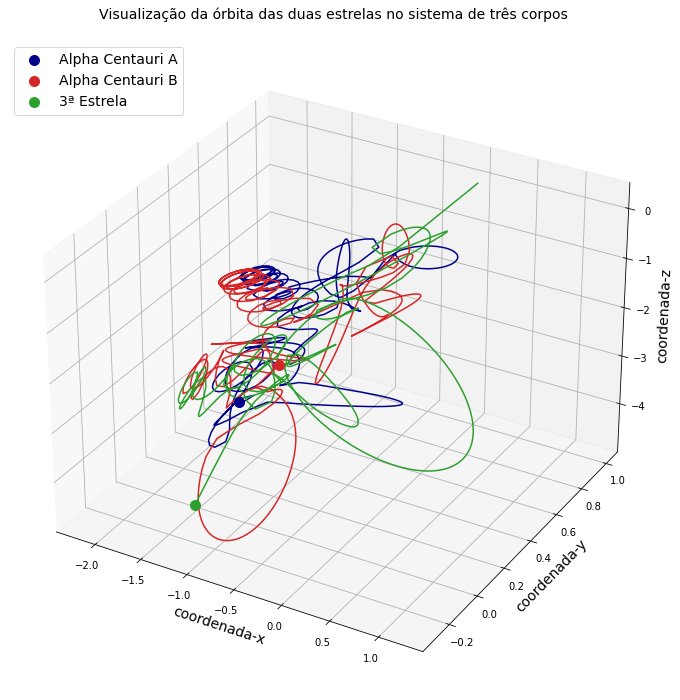

In [8]:
#Create figure
fig=plt.figure(figsize=(12,12))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="tab:green")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:green",marker="o",s=100,label="3ª Estrela")
#Add a few more bells and whistles
ax.set_xlabel("coordenada-x",fontsize=14)
ax.set_ylabel("coordenada-y",fontsize=14)
ax.set_zlabel("coordenada-z",fontsize=14)
ax.set_title("Visualização da órbita das duas estrelas no sistema de três corpos\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

[Three Body](https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767)